# Motivation and background

In a Data Mining class, we asked Dr. Nicolas TURENNE which topic he was interested in, he said Text Mining. So we chose this. Of course, the emergence of BERT shocked academia and changed the research model of NLP. BERT also swept the score of 11 NLP tasks at the same time, making history. That's why we want to choose Text Mining.

# BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding

 - Pre-training
   
   Dur-ing pre-training, the model is trained on unlabeled data  over  different  pre-training  tasks. Learn a language with unsupervised learning


 - Fine-tuning
   
   For  fine-tuning,  the  BERT  model  is  first  initialized  with the pre-trained parameters, and all of the param-eters  are  fine-tuned  using  labeled  data  from  the downstream tasks. Each downstream task has sep-arate fine-tuned models, even though they are ini-tialized with the same pre-trained parameters. The question-answering example in Figure 1 will serve as a running example for this section.

A distinctive feature of BERT is its unified architecture across different tasks. There is mini-mal difference between the pretrained architecture and the final downstream architecture.

# Review of common technology

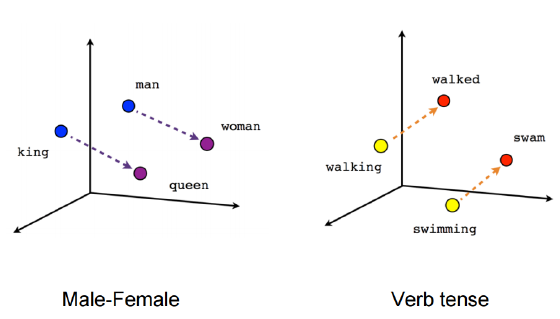

Review: Bag-of-words
--------------------

This model transforms each document to a fixed-length vector of integers.
For example, given the sentences:

- ``John likes to watch movies. Mary likes movies too.``
- ``John also likes to watch football games. Mary hates football.``

The model outputs the vectors:

- ``[1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0]``
- ``[1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1]``

Each vector has 10 elements, where each element counts the number of times a
particular word occurred in the document.
The order of elements is arbitrary.
In the example above, the order of the elements corresponds to the words:
``["John", "likes", "to", "watch", "movies", "Mary", "too", "also", "football", "games", "hates"]``.

Bag-of-words models are surprisingly effective, but have several weaknesses.

First, they lose all information about word order: "John likes Mary" and
"Mary likes John" correspond to identical vectors. There is a solution: bag
of `n-grams <https://en.wikipedia.org/wiki/N-gram>`__
models consider word phrases of length n to represent documents as
fixed-length vectors to capture local word order but suffer from data
sparsity and high dimensionality.

Second, the model does not attempt to learn the meaning of the underlying
words, and as a consequence, the distance between vectors doesn't always
reflect the difference in meaning.  The ``Word2Vec`` model addresses this
second problem.

 - He *deposited* his *money* in this **bank**.

 - His soldiers were arrayed along the *river* **bank**.

The meaning of these two "banks" is not the same.

Review: ``Word2Vec`` Model
--------------------------

``Word2Vec`` is a more recent model that embeds words in a lower-dimensional
vector space using a shallow neural network. The result is a set of
word-vectors where vectors close together in vector space have similar
meanings based on context, and word-vectors distant to each other have
differing meanings. For example, ``strong`` and ``powerful`` would be close
together and ``strong`` and ``Paris`` would be relatively far.

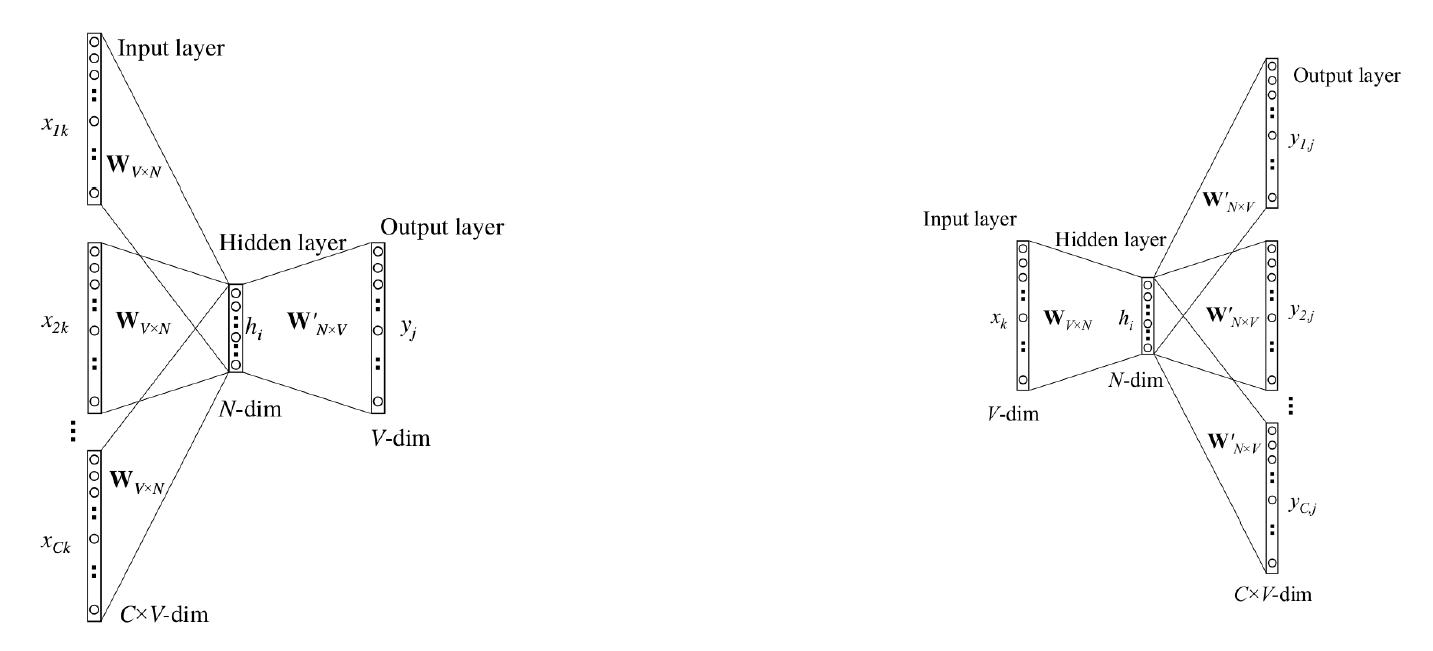

<center>Continuous Bag of Words(CBOW) and Skip-gram</center>

The goal of CBOW is to predict the probability of the current word based on the context.

Skip-gram is just the opposite: the probability of predicting context based on the current word

Both of the methods use artificial neural networks as their classification algorithms. At first, each word was a random N-dimensional vector. After training, the algorithm uses CBOW or Skip-gram methods to obtain the optimal vector for each word.Take a window of appropriate size as the context, read the words in the window in the input layer, and add their vectors (K-dimensional, initial random) together to form K nodes in the hidden layer. The output layer is a huge binary tree, and the leaf nodes represent all the words in the corpus (the corpus contains V independent words, then the binary tree has | V | leaf nodes). The algorithm for constructing the entire binary tree is the ``Huffman tree``.

``word2vec`` only performs "semantic analysis" based on the dimension of words, and does not have the "semantic analysis" ability of context.

Review: ``Vanilla RNN``
--------------------------

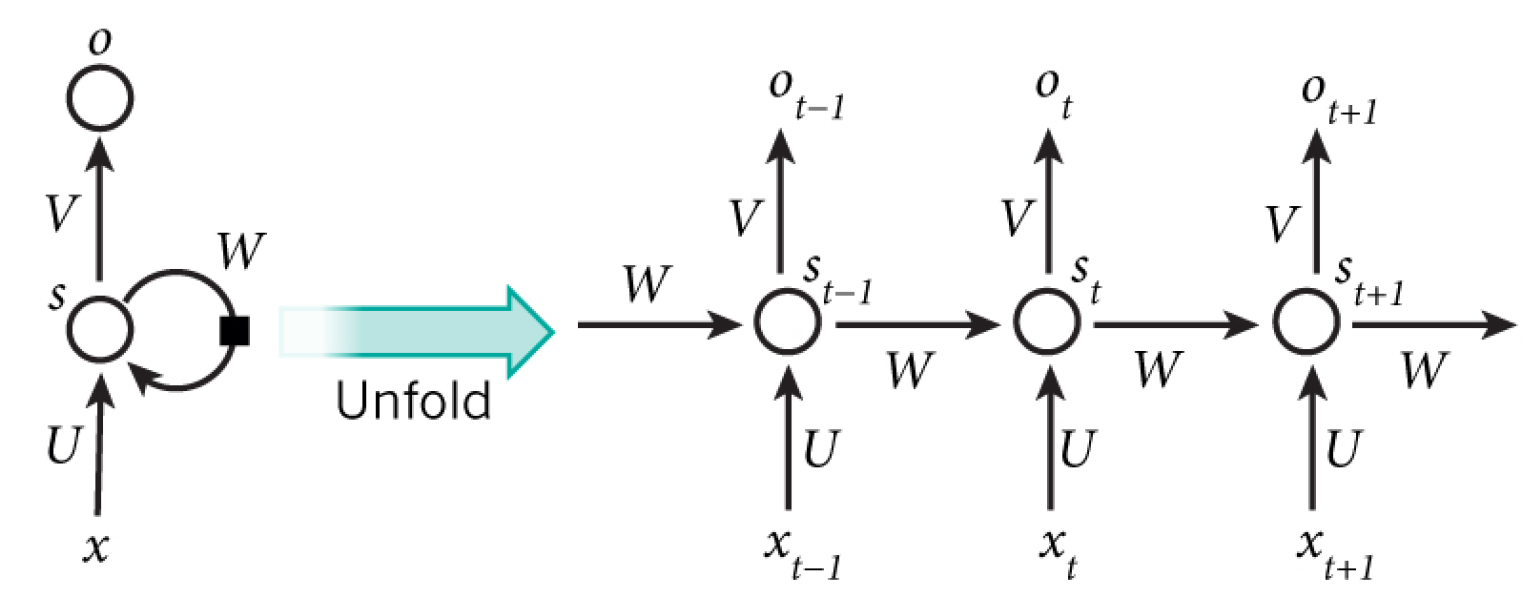

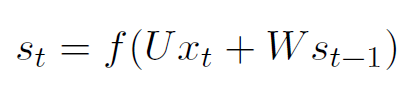

RNN has *"memory"* ability

Like the picture, at S_t, not only c onsiderthe input X_t, but also consider the hidden state at S_t-1.
It can be said that s_t contains all the semantics from the beginning to s_t. Ability to express in a certain context.

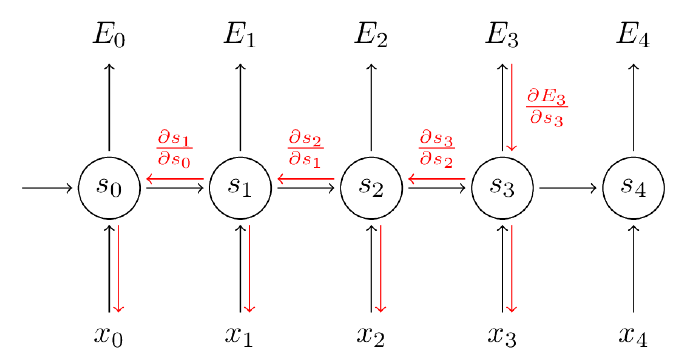

However in neural networks, they are all transmitted by gradient descent, and Loss and Error need to be passed layer by layer. But often after many neurons, these parameters are close to zero, there is a problem of gradient disappearance, and it is difficult to learn strong dependencies.

Review: ``LSTM``
--------------------------

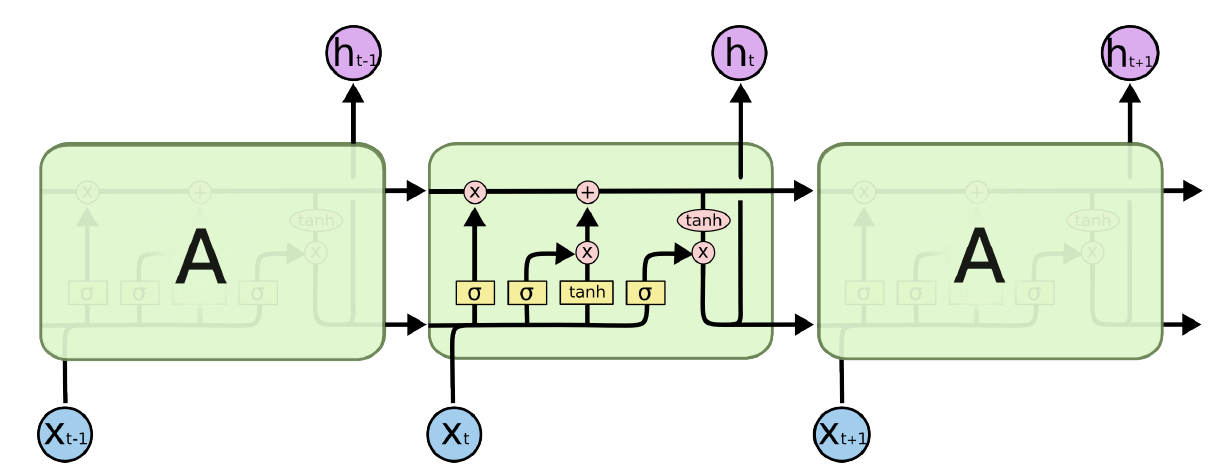

The first step in `LSTM` is to decide what information we will discard from the state of the cell. This decision is made through a layer called forget gate. The next step is to determine what new information is stored in the cell state. Then discard the information we determined needs to be discarded. Then get new candidate values, change according to the degree we decide to update each state. Finally, we need to determine what value to output. This output will be based on our cell state, but also a filtered version.

Review: ``GRU``
--------------------------

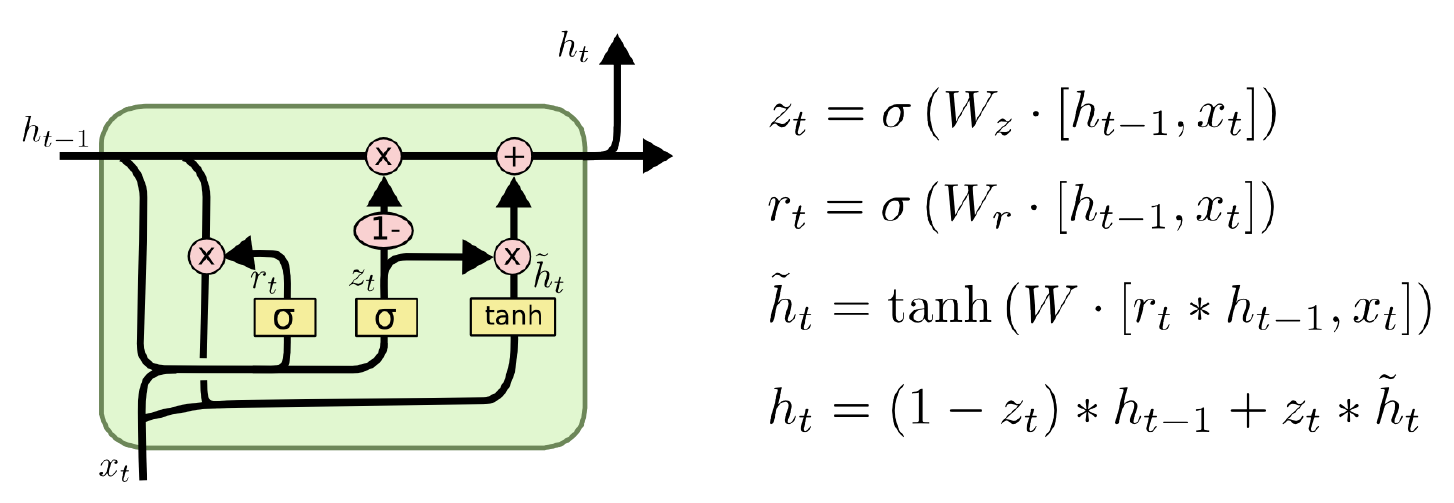

GRU merges forget gate and input gate into one update gate

Review: ``Seq2Seq``
--------------------------

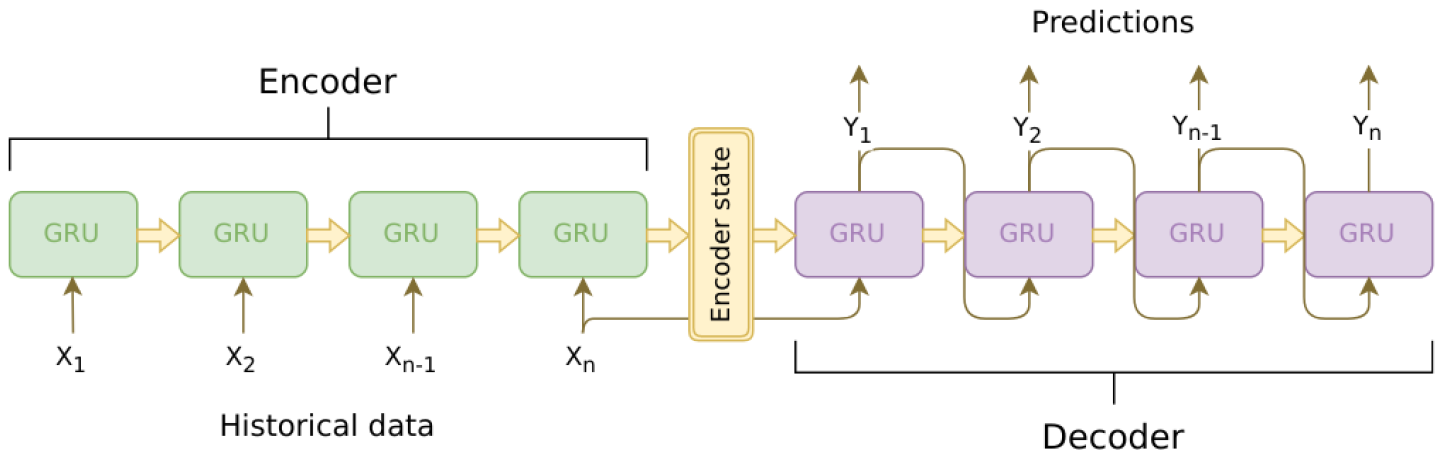

Use two sets of `GRUs` to form a `Seq2Seq`, encode the input into a context vector, use this context vector to encode the semantics of the entire sentence, and then use the decoder to decode it. When predicting, the output of the first moment is used as the input of the second moment, of course, it will also bring the semantic state of the first moment. Until the last word.

But this is actually very difficult. If you use a context vector to encode all the semantics of a sentence. For example, if a human reads a 100-word sentence, you can remember the approximate meaning of the entire sentence, but you cannot remember every word and every detail.

Review: ``Attention``
--------------------------

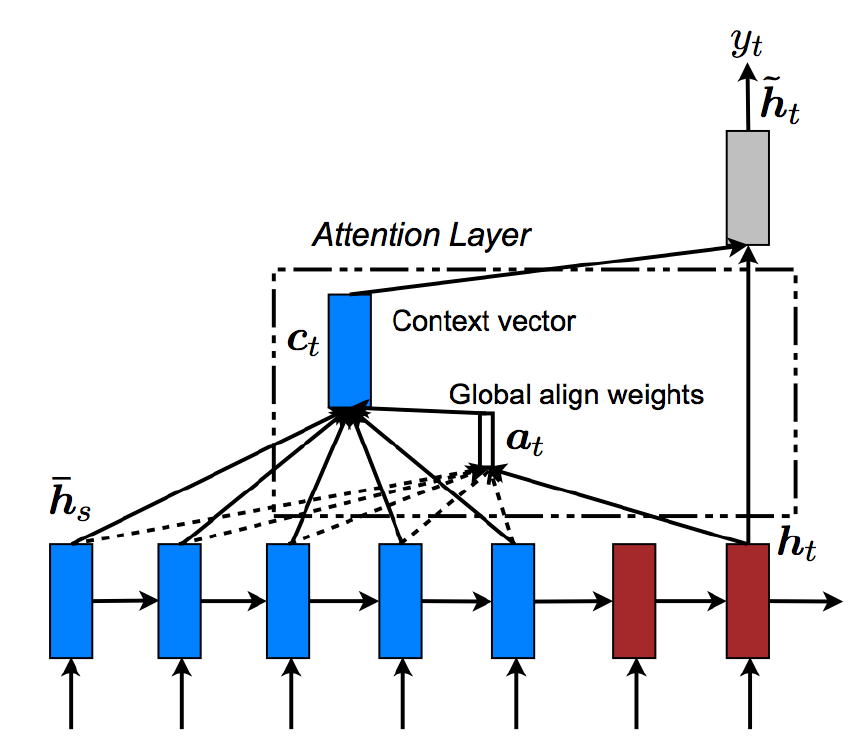

Attention can be said to be "pay attention to", related words when translating a certain word. In the figure, the blue block is equivalent to a sentence word, and each word is encoded into a vector by RNN. The red block is equivalent to Decoder. For example, h_t is the semantic we want to translate, but h_t may be a "rough meaning" rather than a "detailed meaning". So when we translate this h_t, what do we do when we only know a "rough meaning"? At this time, when we translate h_t, we must use h_t to accumulate all the semantics(all blue blocks), and then get the weight. Of course, this weight may be negative infinity to positive infinity, so we need a softmax function to turn it into a 0-1 probability. This can be seen as a way to extract information.

The essence of the attention mechanism is to get inspiration from the human visual attention mechanism (it can be said that it is 'people-oriented'). Roughly, when our vision perceives things, it is generally not a scene that looks at everything from beginning to end, but often it pays attention to a specific part according to the needs. And when we find that a scene often shows what we want to observe in a certain part, we will learn to focus on that part when similar scenes occur in the future. This can be said to be the essence of the attention mechanism. The Attention mechanism is actually a series of attention distribution coefficients, that is, a series of weight parameters.

``self-Attention``
--------------------------

The above models are all based on RNN classes, among which there are still these problems:
1. It cannot operate in parallel. Just like the RNN figure, you must calculate S_t-1 before you can calculate S_t. In this case, the training speed of the RNN is very slow, and it is difficult to train RNNs with many layers.
2. The problem of unidirectional information flow
    - The animal didn't cross the street because it was too tired.
        - `it` stands for animal, **animal is too tired.**
    - The animal didn't cross the street because it was too narrow.
        - `it` stands for street, **street is too narrow.**


    - The animal didn't cross the street because `it?`
            - What is `it` stand for?
    - `it?` was too tired.
            - What is `it` stand for?

In general, when we translate a sentence, it is not enough to just look at the front or back of the sentence, we must refer to the entire sentence.

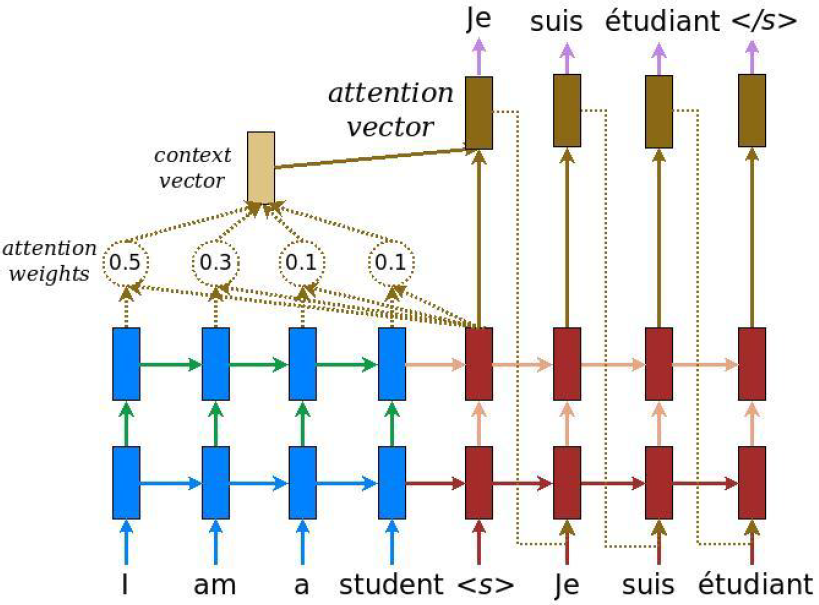

As mentioned earlier, Attention requires external driving and gives corresponding weight.

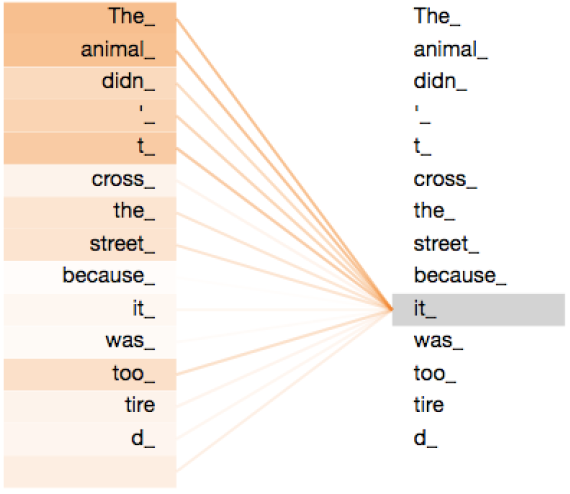

Self-attention will drive itself, for example, `it` is a pronoun, then it will look for nouns by itself. May be `animal` or `street`.

``Transformer``
--------------------------

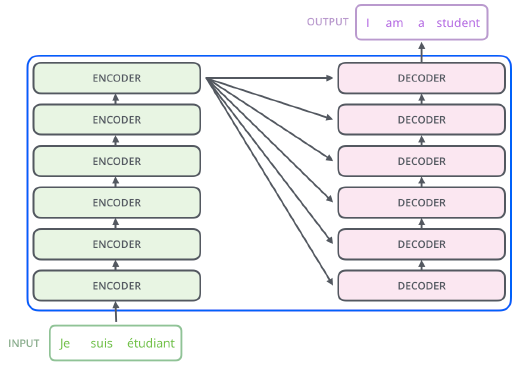

Multilayer Encoder-Decoder

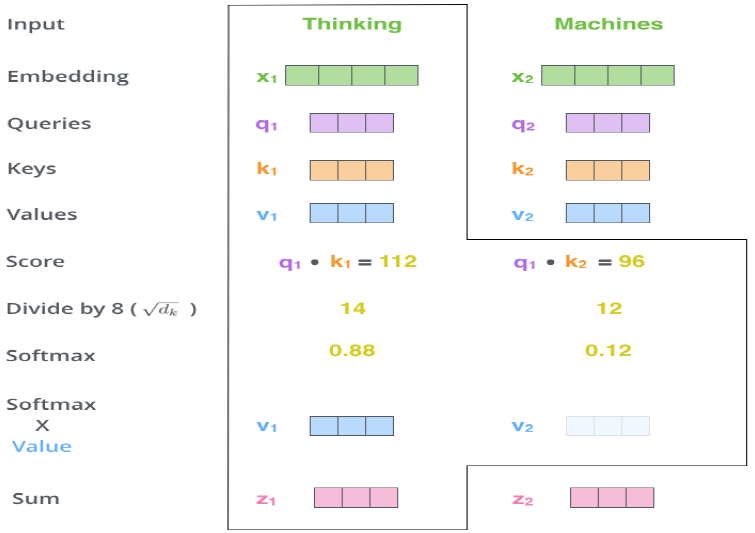

Among them, like X_1, if he is a word `bank`, it may encode a lot of its semantics. q can be seen as a vector used by this word to query other words. k can be seen as a vector used by others when querying itselves. Score refers to how much effort it takes to look at the word. For example, word `thinking`, it needs to focus 112 on the first word and 96 on the second. Finally, calculate v, and add up to sum.

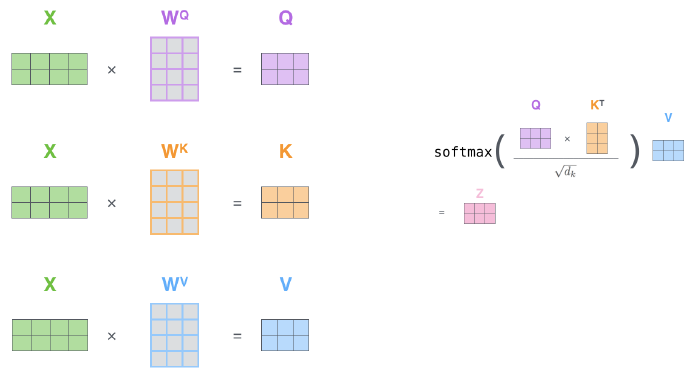

Unlike `RNN`, `transformers` can be calculated in parallel, and all the matrices are calculated at once, which is very fast.

 - Multi-Heads

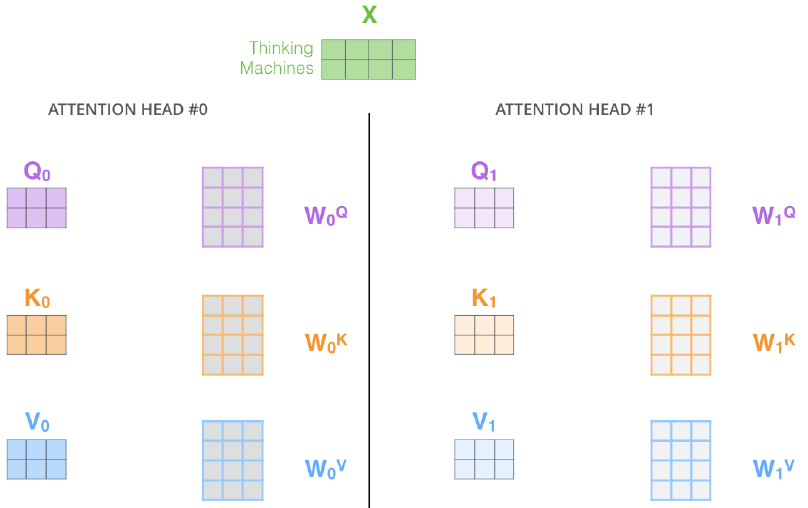

For example, a set of matrices is used to learn how to use `it` as a pronoun, another set of matrices is used to observe the upper and lower positions, and another set of matrices is the correspondence between the capital and the country. Different heads can learn different semantic relationships.

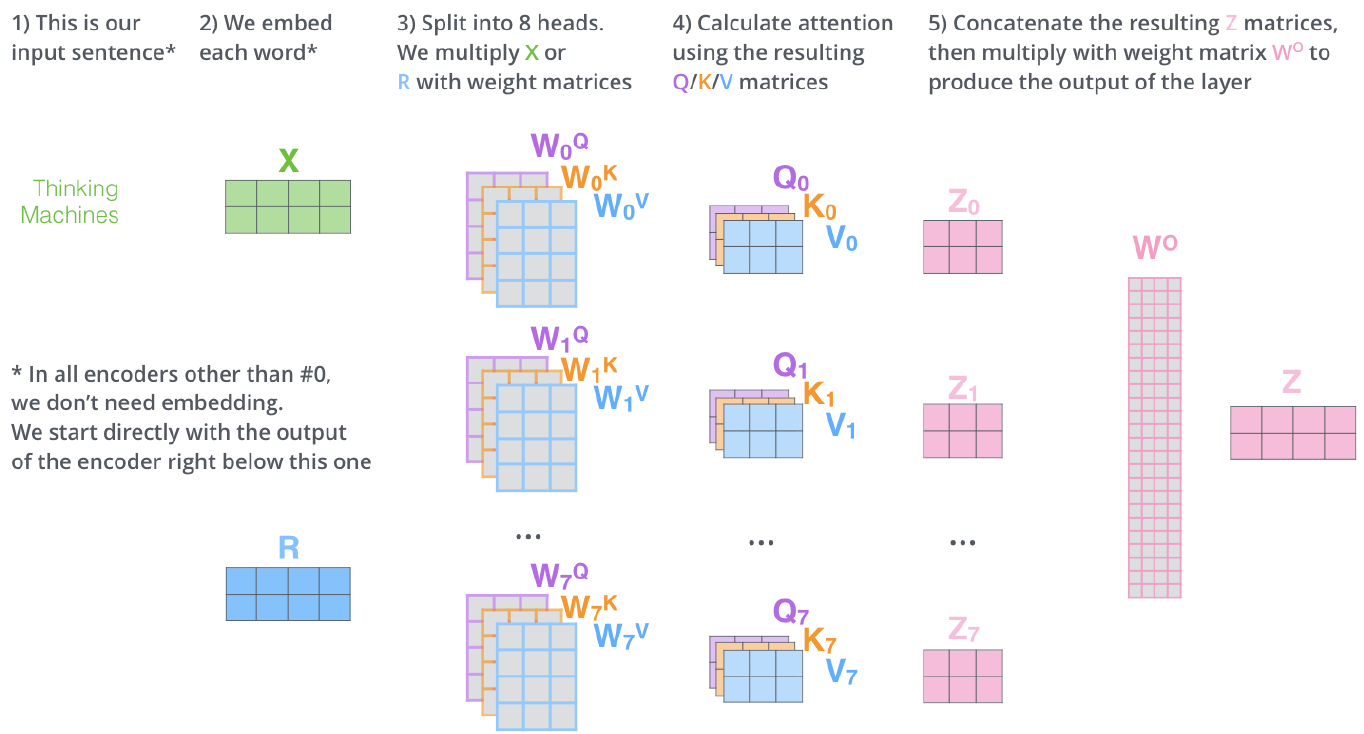

The picture above is the complete process

 - Position coding

 - Air tickets from `Guangzhou` to **Zhuhai**.
 - Air tickets from `Zhuhai` to **Guangzhou**.
 
In traditional self-attention, there is no position encoding. In simple terms, the matrix compiled by `Guangzhou` in these two sentences is the same.

BERT adds position coding

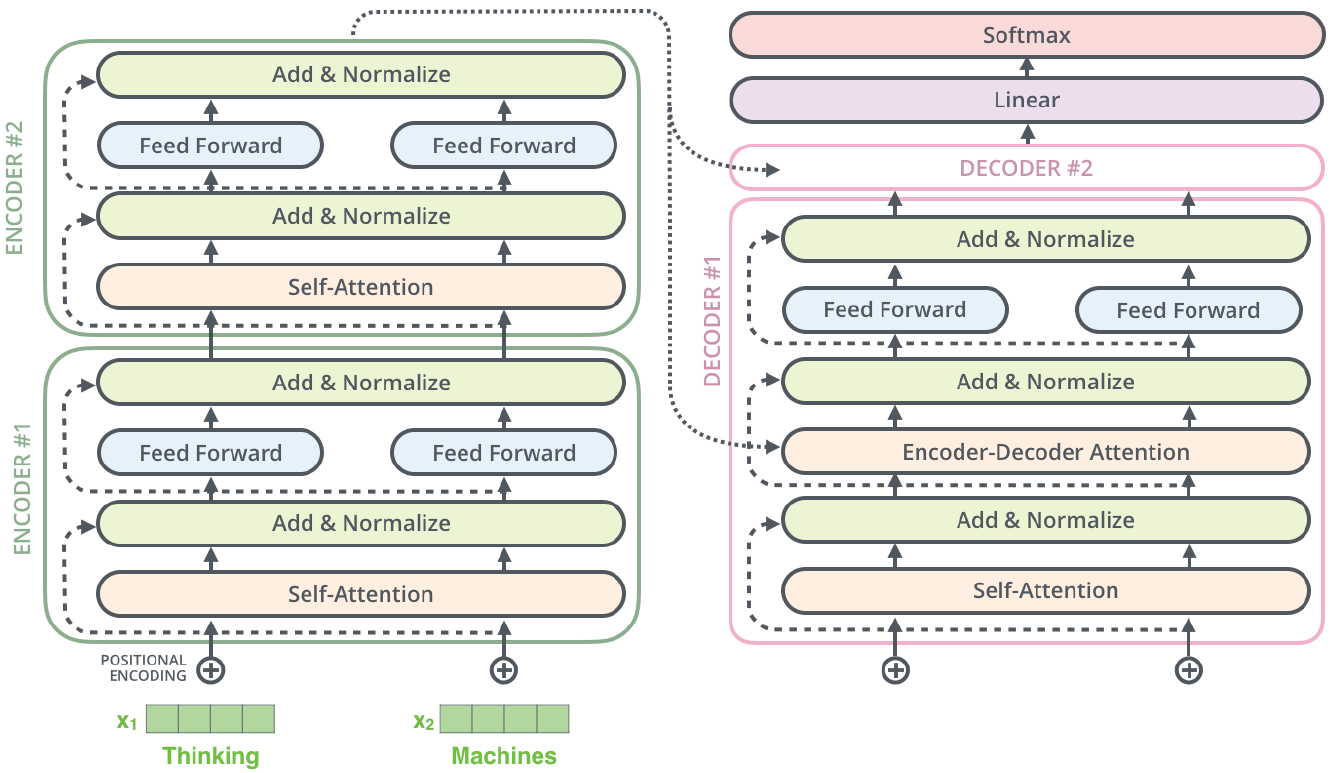

ENCODER # 1 on the left is a complete encoder, adding Self-attention and a fully connected layer, residual connection, etc. Decoder is similar to Encoder, except that he added an `Encoder-Decoder Attention`. So in addition to its information flow from top to bottom, the output of the encoder will also be introduced to attention.

``ELMo``
--------------------------

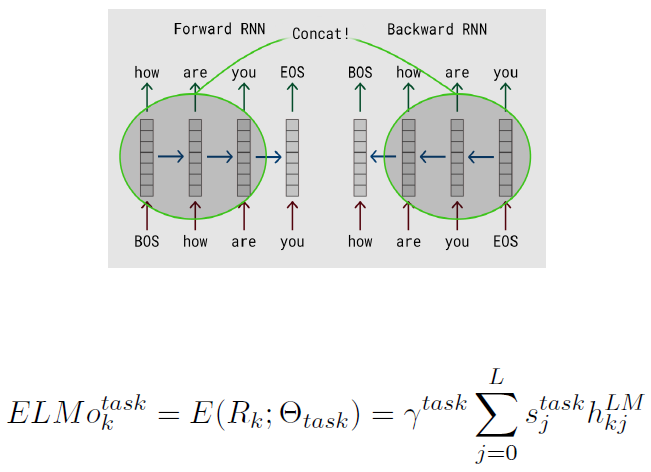

ELMo uses multilayer bidirectional LSTM.

ELMo uses `contextual word embedding` as a feature, but context is learned through unsupervised corpus. Although it is still possible to learn something, there are still some differences from the corpus of real specific tasks. The context learned may not be appropriate for the specific task.

``OpenAI GPT``
--------------------------

- According to the mission `Fine-Tuning`
- Use Transformer instead of RNN / LSTM
- ...

But...

- Sentences are masked, and you can only "look at" the front of the current word in the sentence. Can't "look at" the back.
- Pretraining does not match Fine-Tuning.

# BERT

How to solve openAI GPT's problems?
 - Masked language model  [Solving one-way information flow]
 - Next sentence predict Multi-task Learning
 - Encoder again

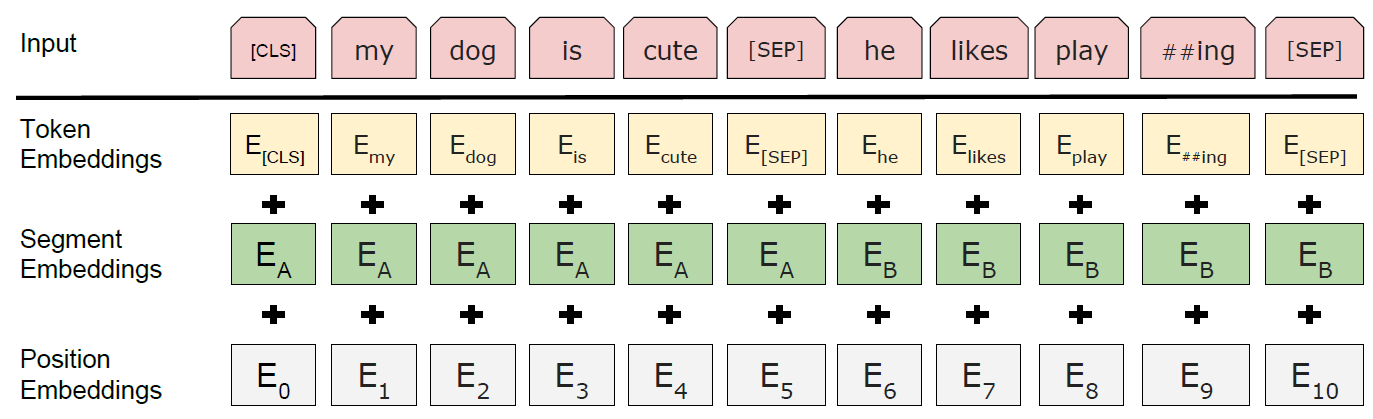

Use [CLS] to indicate the beginning of a sentence, and [SEP] to split the sentence. It use token embedding, segment embedding and position embedding.

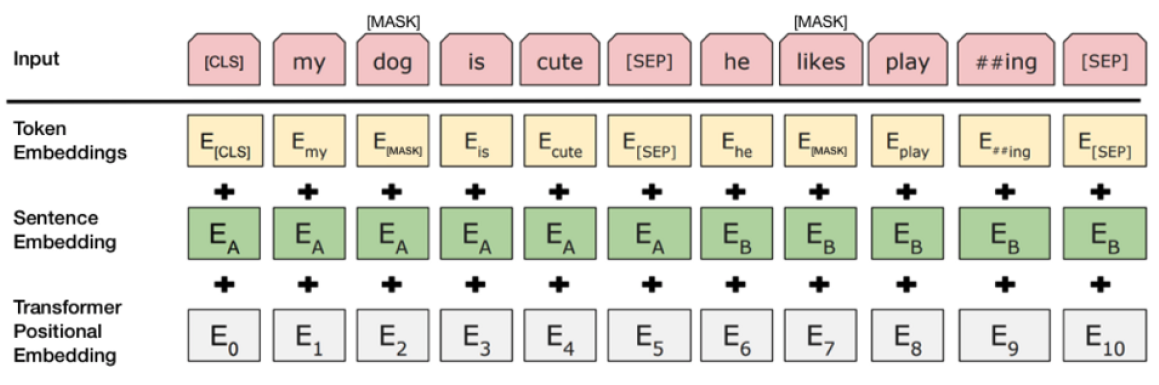

 - Masked LM
  - Similar to cloze, random mask 15% of words, let Bert predict.

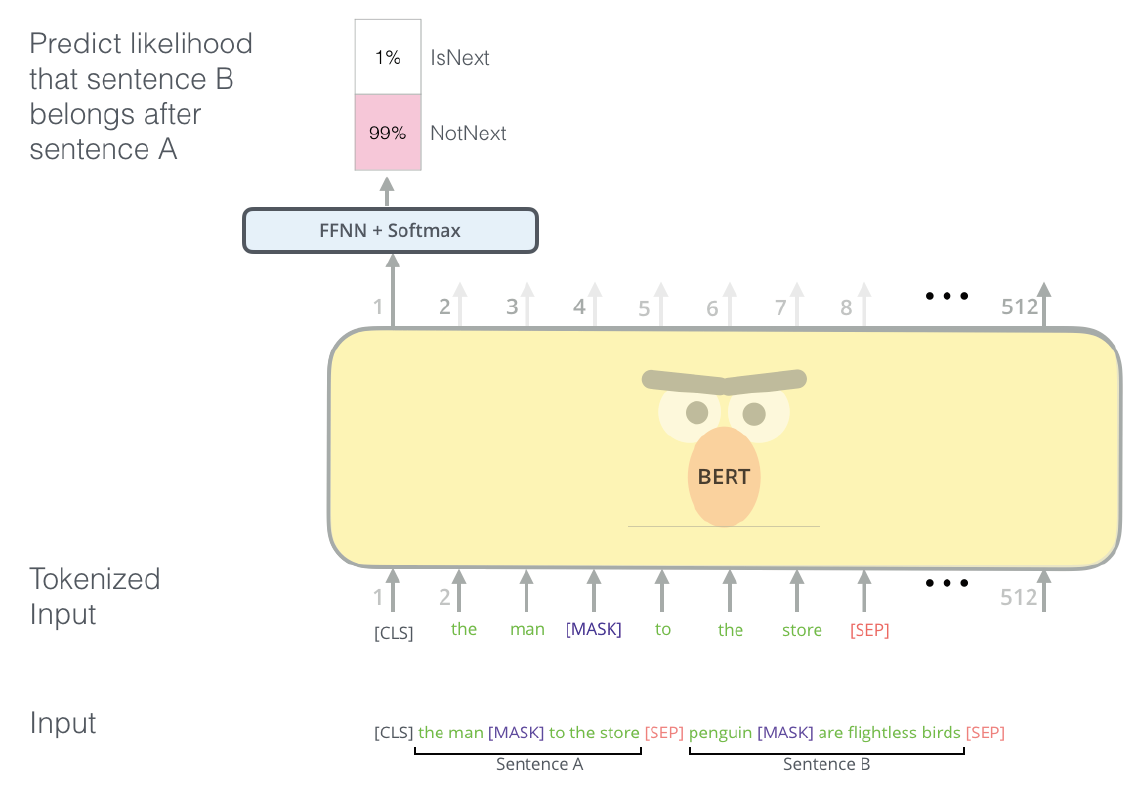

 - Introduce predictive sentence relationships to resolve the mismatch between Pre-traning and Fine-tuning

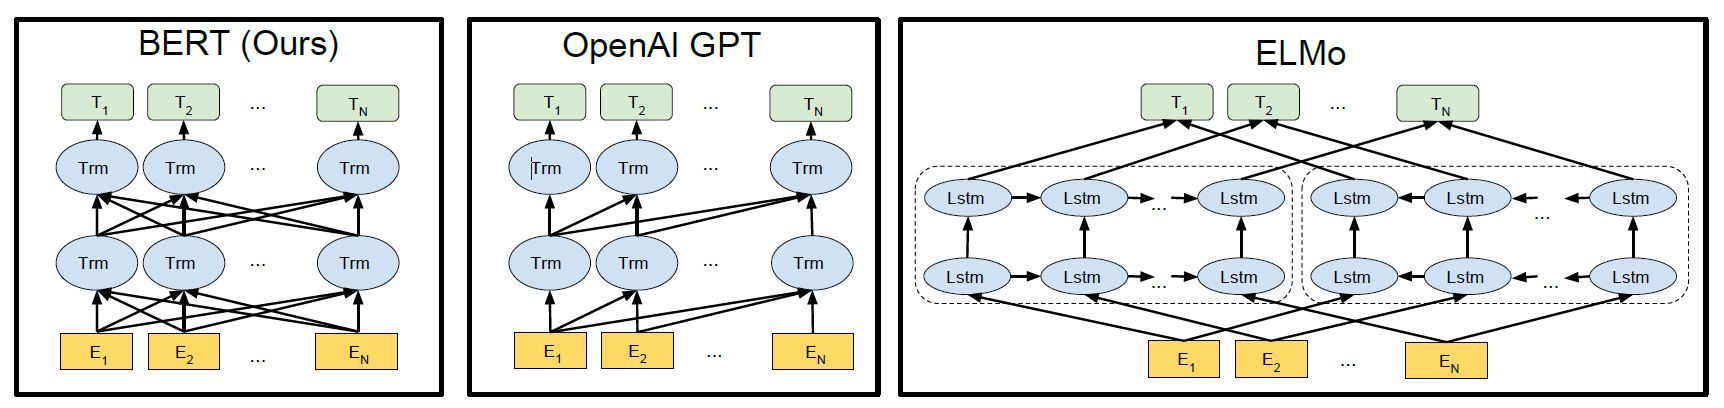

Differences in pre-training model architectures. BERT uses a bidirectional Transformer. OpenAI GPT uses a left-to-right Transformer. ELMo uses the concatenation of independently trained left-to-right and right-toleft LSTMs to generate features for downstream tasks. Among the three, only BERT representations are jointly conditioned on both left and right context in all layers. In addition to the architecture differences, BERT and OpenAI GPT are fine-tuning approaches, while ELMo is a feature-based approach.

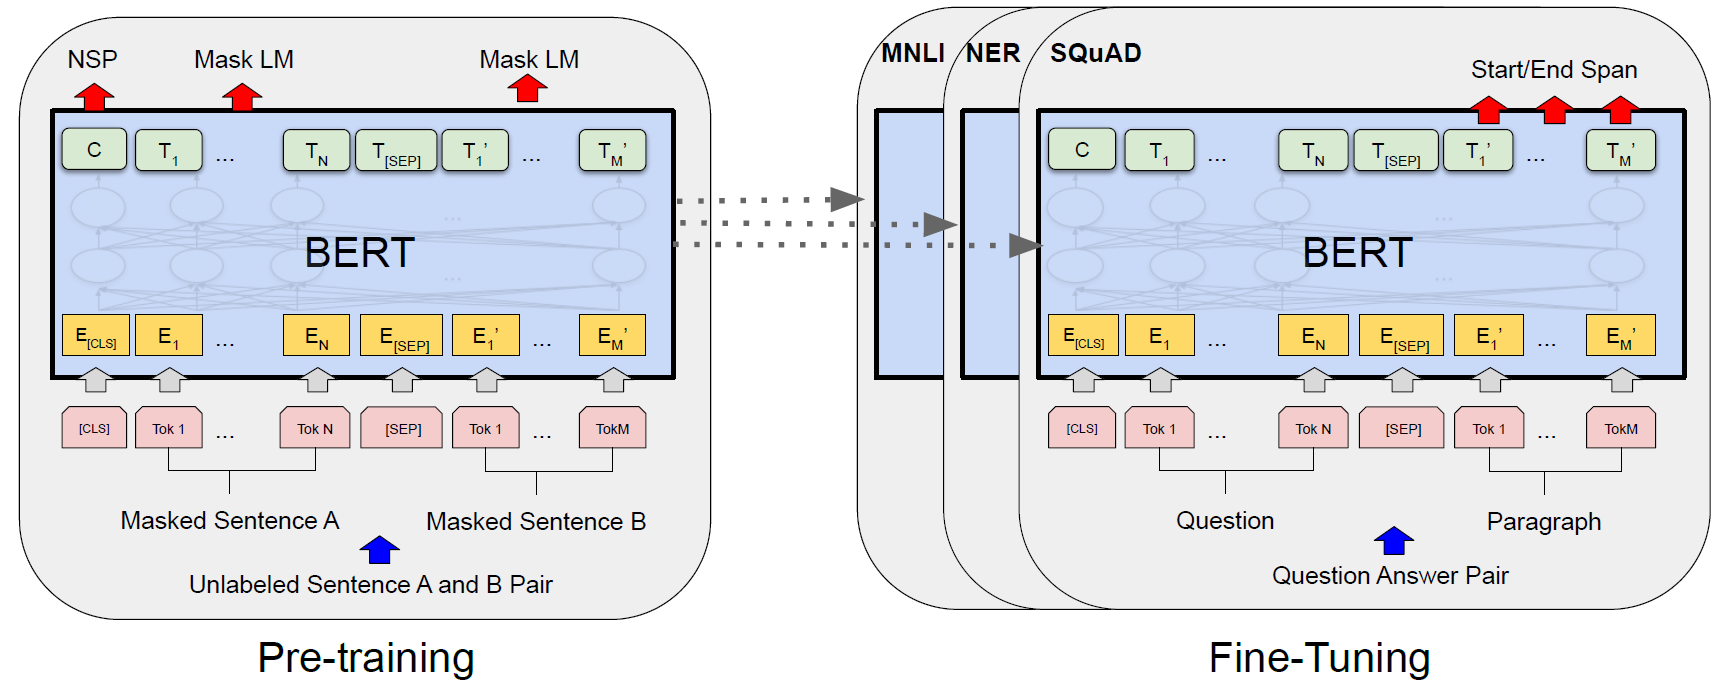

Overall pre-training and fine-tuning procedures for BERT. Apart from output layers, the same architec-tures are used in both pre-training and fine-tuning.  The same pre-trained model parameters are used to initializemodels for different down-stream tasks.  During fine-tuning, all parameters are fine-tuned. [CLS] is a specialsymbol added in front of every input example,  and [SEP] is a special separator token (e.g.   separating ques-tions/answers).

For example, text classification and sentiment classification, we enter a sentence, first come first with BERT, encoding a lot of vectors. Then a fully connected layer is connected to the first vector to make a classification.

# A simple Q&A robot

BERT can do many things, such as translation, sentiment analysis, question answering robot, etc.

The following is a Q & A robot based on the common questions of UIC admissions.
 - Similarity calculation(like KNN)
 - Intent classification

There are two modes, here we use the first mode.

In [1]:
import numpy as np
import pandas as pd
from bert_serving.client import BertClient
from termcolor import colored
# Import packages

In [2]:
bc = BertClient()
# Start bert client

In [3]:
# Encode the sentence
bc.encode(['I love UIC ds!']).shape

(1, 768)

In [4]:
bc.encode(['I love UIC ds!'])

array([[ 3.28549623e-01,  2.27723256e-01, -2.75719818e-02,
        -2.92795420e-01,  1.72237918e-01, -8.43800247e-01,
         5.86637139e-01, -4.82229710e-01, -1.36713862e-01,
         4.29402828e-01, -2.39786774e-01,  4.77168500e-01,
         1.98632516e-02, -4.04778957e-01,  1.32556212e+00,
        -4.47109729e-01,  3.39814752e-01,  1.39031231e-01,
        -2.32591927e-01,  1.28316090e-01,  4.22742546e-01,
         2.88237929e-01, -1.97668329e-01,  2.39096090e-01,
         7.38043547e-01,  2.52148449e-01, -3.10648948e-01,
         3.40460092e-02,  5.71894705e-01, -1.22017853e-01,
        -3.72085392e-01, -1.30522504e-01,  2.86171764e-01,
         4.44296688e-01, -1.37933359e-01,  3.02929431e-01,
         5.31697333e-01,  4.74559814e-01,  6.57850970e-03,
         1.18397474e-01,  3.88419956e-01, -2.32772186e-01,
        -3.19971442e-01,  8.37458670e-02,  2.16890037e-01,
         1.74603790e-01,  4.08070773e-01,  1.58761263e-01,
         2.19197273e-01,  4.33187746e-02,  4.46505696e-0

In [5]:
question_file = 'q.csv'
questions = pd.read_csv(question_file, header=None)

answer_file = 'a.csv'
answers = pd.read_csv(answer_file, header=None)
# Load Q&A template from UIC Admission Office

questions_list = list()
for i in questions.values:
    questions_list.append(i[0])

answers_list = list()
for i in answers.values:
    answers_list.append(i[0])
# Data processing

In [6]:
doc_vecs = bc.encode(questions_list)
# Encode questions

In [12]:
topk = 5
# top k matched question
query = input(colored('Your question: ', 'green'))
#Input your question here.
query_vec = bc.encode([query])[0]

# compute normalized dot product as score
score = np.sum(query_vec * doc_vecs, axis=1) / np.linalg.norm(doc_vecs, axis=1)
topk_idx = np.argsort(score)[::-1][:topk]
for idx in topk_idx:
    print('>%s\nQuestion:%s\n%s' % (colored(score[idx], 'red'),
                                    colored(questions_list[idx], 'yellow'),
                                    colored(answers_list[idx], 'green')))

Your question: 假期课程
>16.205692
Question:什么是暑期课程？
暑期课程是UIC学子在大一至大三的暑假期间的一个短期校外留学项目，一般为期3-5周，项目根据不同国家和院校设计了很多不同专业科目和语言背景的课程。暑期课程分为香港浸会大学暑期课程和海外暑期课程。
>15.973037
Question:在UIC暑假，学生只是去修暑期课程吗？
除了暑期课程，学生还可选择参加UIC全人教育暑期实践活动、中国语言文化中心台湾游学营、香港浸会大学“大都会体验计划”（海外实习）等。UIC全人教育办公室与国内外各类机构（如户外体育运动协会，非政府组织、慈善公益组织、自然保护管理区、学校等）合作共同组织并开展体验全人教育模块特色的体验式学习活动，为学生提供丰富多彩的寒暑期项目。每个项目一般持续2-3个星期，传统项目有：柬埔寨，泰国等暑期义工服务项目，上海真爱梦想教练计划，中国西北部沙漠草原环境之行，台湾潜水&海洋文化游、瑞士户外体育探险夏令营等。
>15.9349575
Question:副修课程有哪些？
目前学校共推出五个副修课程，每个副修课程学生最多可修得15个学分，副修课程分别为：音乐、工商管理、财务学、公共关系与广告学以及应用心理学。
>15.910742
Question:暑期课程是必须参加的吗？
暑期课程为学生自愿申请参加，2016年约有700人参加海外或香港的暑期课程。
>15.607442
Question:学生会被退学吗？
我校有一些严格的学术规定，学术处分适用于所有本科生
a) 学术警告：适用于某一学期平均绩点（GPA）在1.67-1.99之间的学生；
b) 留校察看：适用于某一学期的平均绩点（GPA）在1.67以下的学生；
c) 勒令退学：如学生连续两学期的平均绩点（GPA）低于1.67或其他学术原因，由教务议会（Senate）作出决定。
